In [37]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
from sklearn.decomposition import PCA
import collections
import scipy.cluster.hierarchy as hier
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import tools
import plotly.figure_factory as ff
# from sklearn_extra.cluster import KMedoids
import scipy.cluster
from sklearn.cluster import AgglomerativeClustering
import warnings
from kmodes.kmodes import KModes
warnings.filterwarnings("ignore")

In [3]:
# reading csv file
df_dep=pd.read_csv("../Datasets/Depression.csv")
df_anx=pd.read_csv("../Datasets/Anxiety.csv")
df_str=pd.read_csv("../Datasets/Stress.csv")
df=pd.read_csv("../Datasets/CleanData.csv")

In [27]:
# sampling dataset
df_dep_samp=df_dep.sample(n=4000)
df_anx_samp=df_anx.sample(n=8000)
df_str_samp=df_str.sample(n=8000)

In [5]:
df_samp=df.sample(n=8000)

In [29]:
X_dep=df_dep_samp.iloc[:,0:7]
X_anx=df_anx_samp.iloc[:,0:7]
X_str=df_str_samp.iloc[:,0:7]
X=df_samp.iloc[:,0:21]

In [7]:
df_dep["Age"]=df["age class"]
df_dep["family"]=df["family"]
df_dep["Depression"]=df["Dep"]

df_anx["Age"]=df["age class"]
df_anx["family"]=df["family"]
df_anx["Anxiety"]=df["Anx"]

df_str["Age"]=df["age class"]
df_str["family"]=df["family"]
df_str["Stress"]=df["Str"]

In [8]:
df_dep.head()

Q3(D)  Q5(D)  Q10(D)  Q13(D)  Q16(D)  Q17(D)  Q21(D)  Depression    Age  \
0      2      2       2       3       2       3       2          32  18-25   
1      1      1       1       0       1       1       1          12  18-25   
2      3      3       3       3       3       3       3          42  18-25   
3      1      1       2       2       1       2       1          20  18-25   
4      0      1       2       2       0       2       1          16  18-25   

    family  
0  Nuclear  
1  Nuclear  
2  Nuclear  
3  Nuclear  
4  Nuclear

In [9]:
colors = ['#274472', '#5885AF', '#C3E0E5','#007e79']
fig = go.Figure(data=[
    go.Bar(name='family', x=df['family'].unique(), y=list(df['family'].value_counts())
           ,marker_color=colors),
])
fig.show()

### ['Extended', 'Joint', 'Nuclear']
### by the above graph it is evident that most of the people who gave the survey belong to nuclear family

In [10]:
colors = ['#274472', '#5885AF', '#C3E0E5','#007e79']
fig = go.Figure(data=[
    go.Bar(name='age class', x=df['age class'].unique(), y=list(df['age class'].value_counts())
           ,marker_color=colors),
])
fig.show()

### since we have 7features each dataset,it's hard to visualize hence we will reduce the dimensions using PCA

In [30]:
pca = PCA(n_components = 3, random_state=1)
X_pca_dep = pca.fit_transform(X_dep)
pca.explained_variance_ratio_.cumsum()[1]
X_pca_dep.shape

(4000, 3)

In [31]:
pca = PCA(n_components = 2, random_state=1)
X_pca_anx = pca.fit_transform(X_anx)
pca.explained_variance_ratio_.cumsum()[1]

0.6377159788097476

In [17]:
# pca = PCA(n_components = 2, random_state=1)
# X_pca_str = pca.fit_transform(X_str)
# pca.explained_variance_ratio_.cumsum()[1]

0.6559720410566855

In [13]:
# pca = PCA(n_components = 2, random_state=1)
# X_pca = pca.fit_transform(X)
# pca.explained_variance_ratio_.cumsum()[1]

### Elbow Method

In [14]:
# from sklearn.cluster import KMeans

# wcss_dep = []
# wcss_anx = []
# wcss_str = []
# for i in range(1,7):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 66)
#     kmeans.fit(X_pca_dep)
#     wcss_dep.append(kmeans.inertia_)
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 66)
#     kmeans.fit(X_pca_anx)
#     wcss_anx.append(kmeans.inertia_)
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 66)
#     kmeans.fit(X_pca_str)
#     wcss_str.append(kmeans.inertia_)

# plt.plot(range(1, 7), wcss_dep,marker='o')
# plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
# plt.xlabel('No.of clusters')
# plt.ylabel('wcss')
# plt.grid()
# plt.show()

In [15]:
# plt.plot(range(1, 7), wcss_anx,marker='o')
# plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
# plt.xlabel('No.of clusters')
# plt.ylabel('wcss')
# plt.grid()
# plt.show()

In [16]:
# plt.plot(range(1, 7), wcss_str,marker='o')
# plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
# plt.xlabel('No.of clusters')
# plt.ylabel('wcss')
# plt.grid()
# plt.show()

## silhouette Method

In [17]:
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
# silhouette_avg = []
# for num_clusters in range_n_clusters:
#     kmeans = KMeans(n_clusters=num_clusters)
#     kmeans.fit(X_pca_dep)
#     cluster_labels = kmeans.labels_
#     silhouette_avg.append(silhouette_score(X_pca_dep, cluster_labels))
# plt.plot(range_n_clusters,silhouette_avg,'bx-')
# plt.xlabel('Values of K') 
# plt.ylabel('Silhouette score') 
# plt.title('Silhouette analysis For Optimal k')
# plt.show()

In [18]:
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
# silhouette_avg = []
# for num_clusters in range_n_clusters:
#     kmeans = KMeans(n_clusters=num_clusters)
#     kmeans.fit(X_pca_anx)
#     cluster_labels = kmeans.labels_
#     silhouette_avg.append(silhouette_score(X_pca_anx, cluster_labels))
# plt.plot(range_n_clusters,silhouette_avg,'bx-')
# plt.xlabel('Values of K') 
# plt.ylabel('Silhouette score') 
# plt.title('Silhouette analysis For Optimal k')
# plt.show()

In [19]:
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
# silhouette_avg = []
# for num_clusters in range_n_clusters:
#     kmeans = KMeans(n_clusters=num_clusters)
#     kmeans.fit(X_pca_str)
#     cluster_labels = kmeans.labels_
#     silhouette_avg.append(silhouette_score(X_pca_str, cluster_labels))
# plt.plot(range_n_clusters,silhouette_avg,'bx-')
# plt.xlabel('Values of K')
# plt.ylabel('Silhouette score')
# plt.title('Silhouette analysis For Optimal k')
# plt.show()

In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 2)
ymeans = kmeans.fit_predict(X_pca_dep)

In [33]:
X_pca_dep

array([[-3.8155252 , -0.33881345, -0.42990067],
       [-1.69744046,  0.67660409,  2.37442828],
       [ 3.72229604,  0.31522341,  0.13976838],
       ...,
       [ 3.36335763, -0.16387264, -0.71127789],
       [-1.8469577 , -1.27210878,  0.09274089],
       [-1.49194888, -0.74619607, -1.01416843]])

In [34]:
x1, x2, x3 = X_pca_dep.T

In [35]:
x1.shape, x2.shape, x3.shape

((4000,), (4000,), (4000,))

In [36]:
fig = px.scatter_3d(x = x1, y = x2, z = x3, color = ymeans, opacity= 0.75)
fig.update_traces(marker=dict(size=4,), selector=dict(mode='markers'))
fig.show()

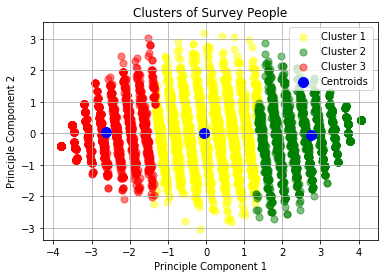

Counter({0: 2775, 2: 2640, 1: 2585})


In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
ymeans = kmeans.fit_predict(X_pca_dep)
plt.scatter(X_pca_dep[ymeans == 0, 0], X_pca_dep[ymeans == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1',alpha=0.5)
plt.scatter(X_pca_dep[ymeans == 1, 0], X_pca_dep[ymeans == 1, 1], s = 50, c = 'green', label = 'Cluster 2',alpha=0.5)
plt.scatter(X_pca_dep[ymeans == 2, 0], X_pca_dep[ymeans == 2, 1], s = 50, c = 'red', label = 'Cluster 3',alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters of Survey People')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid()
plt.show()
#to find the total observations in each cluster
print(collections.Counter(ymeans))

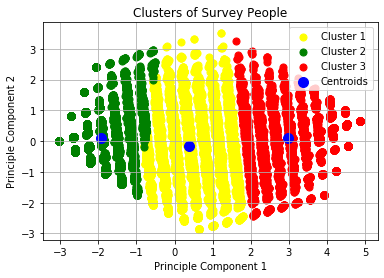

Counter({1: 11566, 0: 10696, 2: 6203})


In [66]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
ymeans = kmeans.fit_predict(X_pca_anx)
plt.scatter(X_pca_anx[ymeans == 0, 0], X_pca_anx[ymeans == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca_anx[ymeans == 1, 0], X_pca_anx[ymeans == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca_anx[ymeans == 2, 0], X_pca_anx[ymeans == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters of Survey People')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid()
plt.show()
#to find the total observations in each cluster
print(collections.Counter(ymeans))

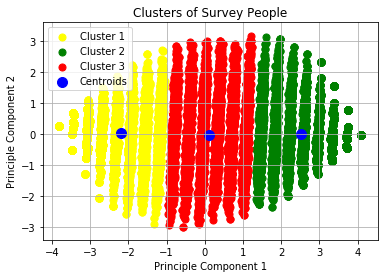

Counter({2: 10443, 0: 9859, 1: 8163})


In [67]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
ymeans = kmeans.fit_predict(X_pca_str)
plt.scatter(X_pca_str[ymeans == 0, 0], X_pca_str[ymeans == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca_str[ymeans == 1, 0], X_pca_str[ymeans == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca_str[ymeans == 2, 0], X_pca_str[ymeans == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters of Survey People')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid()
plt.show()
#to find the total observations in each cluster
print(collections.Counter(ymeans))

### K means without PCA

In [68]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
ymeans = kmeans.fit_predict(X_dep)
print("Depression",collections.Counter(ymeans))
y_dep = pd.DataFrame(ymeans, columns=['cluster'])
result_dep = pd.concat([X_dep, y_dep], axis=1)

Depression Counter({2: 10122, 0: 9437, 1: 8906})


In [69]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
ymeans = kmeans.fit_predict(X_anx)
print("Anxiety",collections.Counter(ymeans))
y_anx = pd.DataFrame(ymeans, columns=['cluster'])
result_anx = pd.concat([X_anx, y_anx], axis=1)

Anxiety Counter({2: 11633, 0: 10293, 1: 6539})


In [70]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
ymeans = kmeans.fit_predict(X_str)
print("Stress",collections.Counter(ymeans))
y_str = pd.DataFrame(ymeans, columns=['cluster'])
result_str = pd.concat([X_str, y_str], axis=1)

Stress Counter({0: 10488, 2: 9814, 1: 8163})


In [77]:
mean_1_dep = result_dep[result_dep['cluster']==0].iloc[:, 0:7].mean(axis = 1)
mean_2_dep = result_dep[result_dep['cluster']==1].iloc[:, 0:7].mean(axis = 1)
mean_3_dep = result_dep[result_dep['cluster']==2].iloc[:, 0:7].mean(axis = 1)
print('Mean cluster 1(Depression) : ' + str(mean_1_dep.mean()))
print('Mean cluster 2(Depression) : ' + str(mean_2_dep.mean()))
print('Mean cluster 3(Depression) : ' + str(mean_3_dep.mean()))

Mean cluster 1(Depression) : 0.4600887085786947
Mean cluster 2(Depression) : 2.499197972474423
Mean cluster 3(Depression) : 1.4319304485279583


#### Mean of cluster 2 is greater and since in this scale people with maximum score face depression/anxiety/stress.Maximum people belong to the nuclear family and have age between 18-25 it can be one of the factor to hinder ones mental health 

In [79]:
mean_1_anx = result_anx[result_anx['cluster']==0].iloc[:, 0:7].mean(axis = 1)
mean_2_anx = result_anx[result_anx['cluster']==1].iloc[:, 0:7].mean(axis = 1)
mean_3_anx = result_anx[result_anx['cluster']==2].iloc[:, 0:7].mean(axis = 1)
print('Mean cluster 1(Stress) : ' + str(mean_1_anx.mean()))
print('Mean cluster 2(Stress) : ' + str(mean_2_anx.mean()))
print('Mean cluster 3(Stress) : ' + str(mean_3_anx.mean()))

Mean cluster 1(Stress) : 1.2569291196513344
Mean cluster 2(Stress) : 2.231075087933938
Mean cluster 3(Stress) : 0.42023308076776905


In [80]:
mean_1_str = result_str[result_str['cluster']==0].iloc[:, 0:7].mean(axis = 1)
mean_2_str = result_str[result_str['cluster']==1].iloc[:, 0:7].mean(axis = 1)
mean_3_str = result_str[result_str['cluster']==2].iloc[:, 0:7].mean(axis = 1)
print('Mean cluster 1(Depression) : ' + str(mean_1_str.mean()))
print('Mean cluster 2(Depression) : ' + str(mean_2_str.mean()))
print('Mean cluster 3(Depression) : ' + str(mean_3_str.mean()))

Mean cluster 1(Depression) : 1.48658330609131
Mean cluster 2(Depression) : 2.3985054514271598
Mean cluster 3(Depression) : 0.6164371597426352


## Kmediods

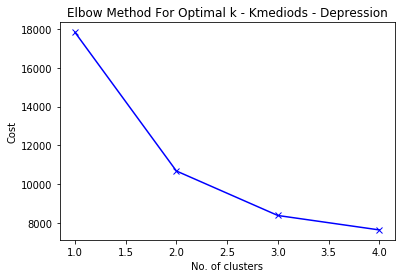

In [47]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmed = KMedoids(metric="euclidean", n_clusters=num_clusters,init="heuristic", max_iter=7)
    kmed.fit_predict(X_pca_dep)
    cost.append(kmed.inertia_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k - Kmediods - Depression')
plt.show()

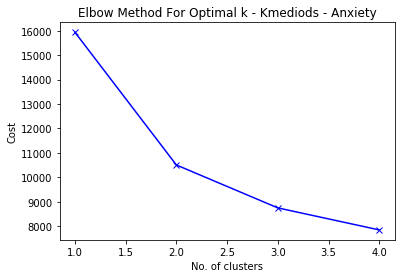

In [45]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmed = KMedoids(metric="euclidean", n_clusters=num_clusters,init="heuristic", max_iter=7)
    kmed.fit_predict(X_pca_anx)
    cost.append(kmed.inertia_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k - Kmediods - Anxiety')
plt.show()

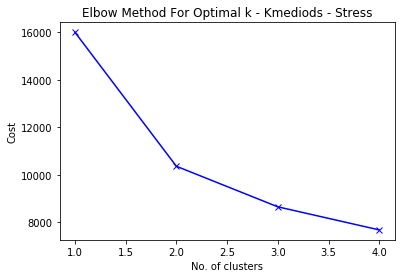

In [46]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmed = KMedoids(metric="euclidean", n_clusters=num_clusters,init="heuristic", max_iter=7)
    kmed.fit_predict(X_pca_str)
    cost.append(kmed.inertia_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k - Kmediods - Stress')
plt.show()

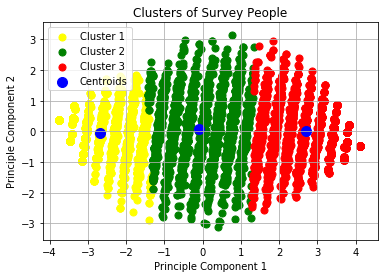

Counter({1: 2808, 0: 2622, 2: 2570})


In [51]:
kmed = KMedoids(metric="euclidean", n_clusters=3,init="heuristic", max_iter=7)
ymed = kmed.fit_predict(X_pca_dep)
plt.scatter(X_pca_dep[ymed == 0, 0], X_pca_dep[ymed == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca_dep[ymed == 1, 0], X_pca_dep[ymed == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca_dep[ymed == 2, 0], X_pca_dep[ymed == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(kmed.cluster_centers_[:, 0], kmed.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters of Survey People')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid()
plt.show()
#to find the total observations in each cluster
print(collections.Counter(ymed))

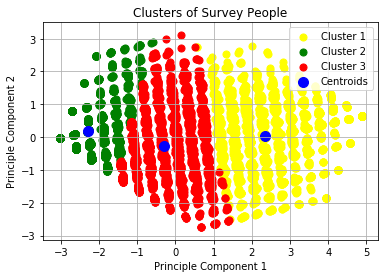

Counter({2: 2969, 1: 2554, 0: 2477})


In [52]:
kmed = KMedoids(metric="euclidean", n_clusters=3,init="heuristic", max_iter=7)
ymed = kmed.fit_predict(X_pca_anx)
plt.scatter(X_pca_anx[ymed == 0, 0], X_pca_anx[ymed == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca_anx[ymed == 1, 0], X_pca_anx[ymed == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca_anx[ymed == 2, 0], X_pca_anx[ymed == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(kmed.cluster_centers_[:, 0], kmed.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters of Survey People')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid()
plt.show()
#to find the total observations in each cluster
print(collections.Counter(ymed))

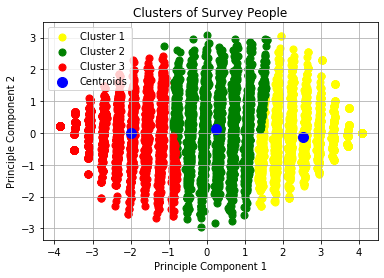

Counter({2: 2948, 1: 2833, 0: 2219})


In [50]:
kmed = KMedoids(metric="euclidean", n_clusters=3,init="heuristic", max_iter=7)
ymed = kmed.fit_predict(X_pca_str)
plt.scatter(X_pca_str[ymed == 0, 0], X_pca_str[ymed == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca_str[ymed == 1, 0], X_pca_str[ymed == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca_str[ymed == 2, 0], X_pca_str[ymed == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(kmed.cluster_centers_[:, 0], kmed.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters of Survey People')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid()
plt.show()
#to find the total observations in each cluster
print(collections.Counter(ymed))

## Kmodes

In [40]:
clusters = 8
costs = []
for cluster in range(2, clusters+1):
    km2 = KModes(n_clusters = cluster, init='Cao', random_state = 1, n_jobs= -1)
    y = km2.fit_predict(X_dep)
    costs.append(km2.cost_)

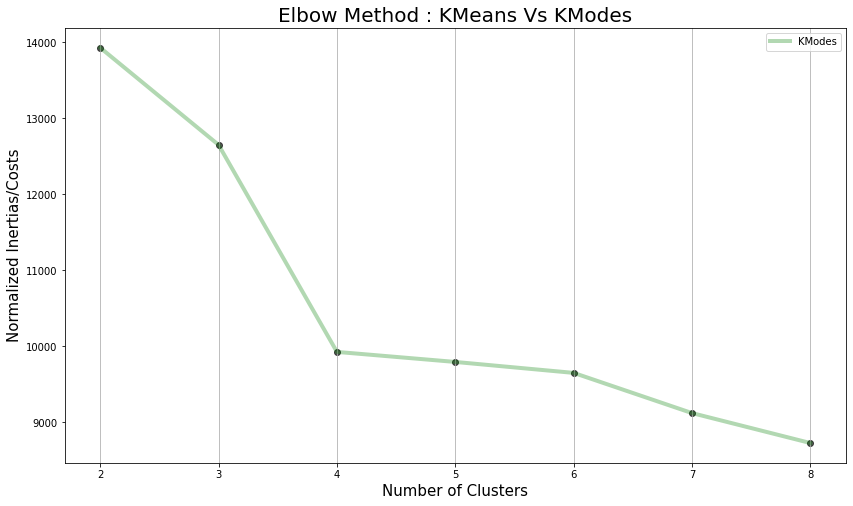

In [41]:
plt.figure(figsize = (14, 8))
plt.grid(axis='x')
plt.xticks(range(2, clusters+1))
plt.title('Elbow Method : KMeans Vs KModes', fontsize = 20)
plt.xlabel('Number of Clusters', fontsize = 15)
plt.ylabel('Normalized Inertias/Costs', fontsize = 15)

# plt.scatter(range(2, clusters+1), inertias, c = 'k',alpha = 0.65)
# plt.plot(range(2, clusters+1), inertias, c = 'b', alpha = 0.3, linewidth = 4, label = 'KMeans')

plt.scatter(range(2, clusters+1), costs, c = 'k',alpha = 0.65)
plt.plot(range(2, clusters+1), costs, c = 'g', alpha = 0.3, linewidth = 4, label = 'KModes')

plt.legend()

# plt.savefig('g05.jpg', bbox_inches = 'tight', facecolor='white')

### Elbow method

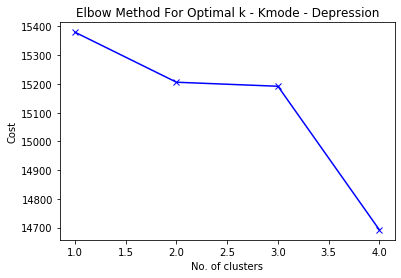

In [54]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=0)
    kmode.fit_predict(X_pca_dep)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k - Kmode - Depression')
plt.show()

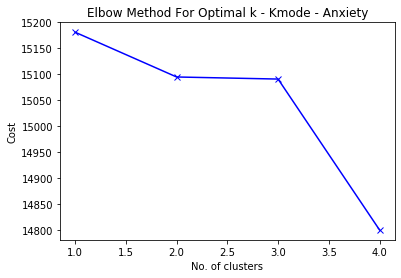

In [55]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=0)
    kmode.fit_predict(X_pca_anx)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k - Kmode - Anxiety')
plt.show()

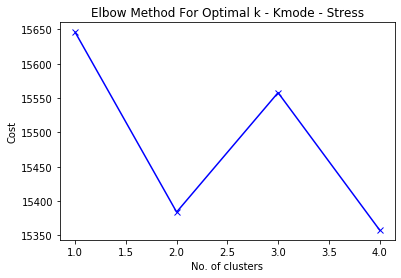

In [56]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=0)
    kmode.fit_predict(X_pca_str)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k - Kmode - Stress')
plt.show()

## Hierarchical Clustering

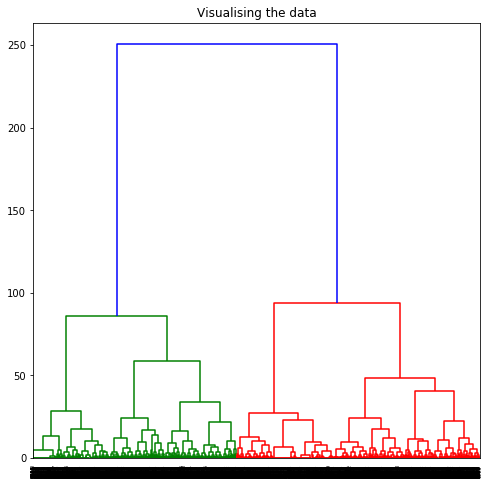

In [12]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = sch.dendrogram((sch.linkage(X_pca_dep, method ='ward')))

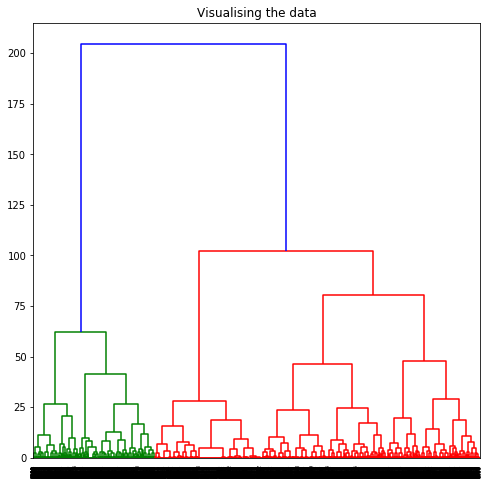

In [13]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = sch.dendrogram((sch.linkage(X_pca_anx, method ='ward')))

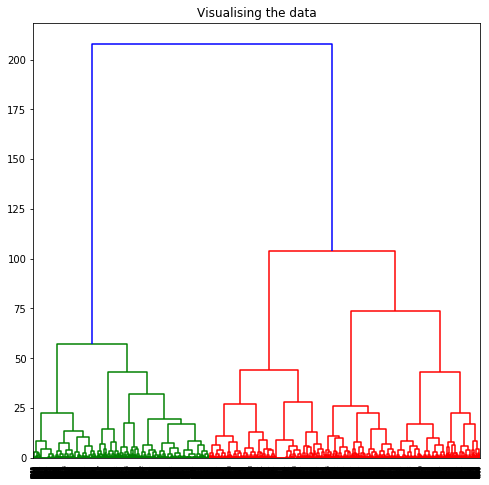

In [14]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = sch.dendrogram((sch.linkage(X_pca_str, method ='ward')))

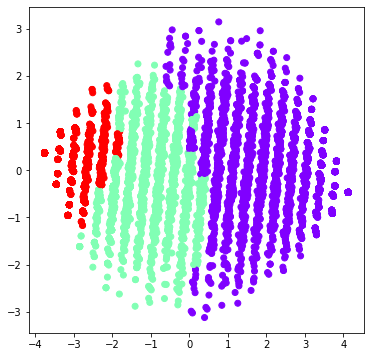

In [26]:
from sklearn.cluster import AgglomerativeClustering 
ac_dep = AgglomerativeClustering(n_clusters = 3) 
model=ac_dep.fit_predict(X_pca_dep)
labels = ac_dep.labels_ 
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_pca_dep[:,0],X_pca_dep[:,1], c = model, cmap ='rainbow') 
plt.show() 

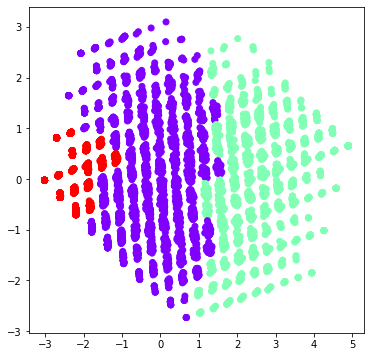

In [23]:
ac_anx = AgglomerativeClustering(n_clusters = 3) 
model=ac_anx.fit_predict(X_pca_anx)
labels = ac_anx.labels_ 
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_pca_anx[:,0], X_pca_anx[:,1], c = model, cmap ='rainbow') 
plt.show()

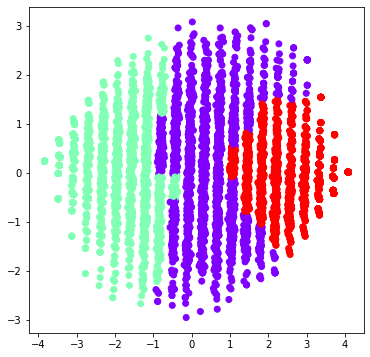

In [24]:
ac_str = AgglomerativeClustering(n_clusters = 3) 
model=ac_str.fit_predict(X_pca_str)
labels = ac_str.labels_ 
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_pca_str[:,0], X_pca_str[:,1], c = model, cmap ='rainbow') 
plt.show() 